In [1]:
from midas_model import Midas, ModelType
import cv2
import os
import time
import matplotlib.pyplot as plt

In [2]:
small = ModelType.MIDAS_SMALL
large = ModelType.DPT_LARGE
hybrid = ModelType.DPT_HYBRID

midas_s = Midas(small, use_cuda=True)
midas_l = Midas(large, use_cuda=True)
midas_h = Midas(hybrid, use_cuda=True)

Using cache found in C:\Users\danii/.cache\torch\hub\isl-org_MiDaS_master
E:\signature\venv\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading weights:  None


Using cache found in C:\Users\danii/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


Using cuda
Transforming image


Using cache found in C:\Users\danii/.cache\torch\hub\isl-org_MiDaS_master
Using cache found in C:\Users\danii/.cache\torch\hub\isl-org_MiDaS_master


Using cuda
Transforming image


Using cache found in C:\Users\danii/.cache\torch\hub\isl-org_MiDaS_master
Using cache found in C:\Users\danii/.cache\torch\hub\isl-org_MiDaS_master
E:\signature\venv\Lib\site-packages\timm\models\_factory.py:126: UserWarning: Mapping deprecated model name vit_base_resnet50_384 to current vit_base_r50_s16_384.orig_in21k_ft_in1k.
  model = create_fn(


Using cuda
Transforming image


Using cache found in C:\Users\danii/.cache\torch\hub\isl-org_MiDaS_master


In [3]:
def process_image(image_path, model, mask_threshold=300):
    frame = cv2.imread(image_path)

    mask = model.mask_nearest_object(frame, mask_threshold)
    frame[mask] = 0

    
    cv2.imshow('Processed Image', frame)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [4]:
def depth_colormap(self, frame):
    depth_map = self.predict(frame)
    depth_map = cv2.normalize(depth_map, None, 0, 255,
                              cv2.NORM_MINMAX,
                              dtype=cv2.CV_8U)
    depth_map = cv2.applyColorMap(depth_map,
                                  cv2.COLORMAP_INFERNO)
    return depth_map


def show_depth_map(depth_map, title="Depth Map"):
    # inferno
    plt.imshow(depth_map)
    plt.axis('off')
    plt.title(title)
    plt.show()


def show_process_time(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"Processing time: {end_time - start_time} s")
        return result

    return wrapper


@show_process_time
def depth_map(model, frame):
    frame = frame.copy()
    return model.depth_colormap(frame)

@show_process_time
def run_midas_bench(model, image, fps=1, use_cuda=True):
    if use_cuda:
        model.use_cuda()
    else:
        model.use_cpu()
    for i in range(fps):
        depth = model.predict(image)

def mask_nearest_object(depth, depth_threshold=300):
    mask = depth < depth_threshold
    return mask

In [5]:
frame = cv2.imread("image.png")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

depth_s = depth_map(midas_s, frame)
depth_h = depth_map(midas_h, frame)
depth_l = depth_map(midas_l, frame)

Processing time: 2.3520309925079346 s
Processing time: 0.7830350399017334 s
Processing time: 0.1874997615814209 s


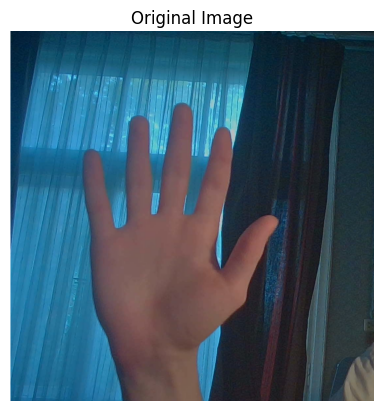

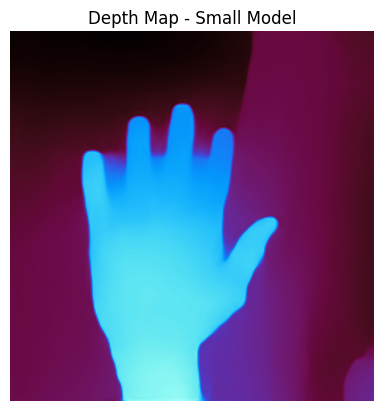

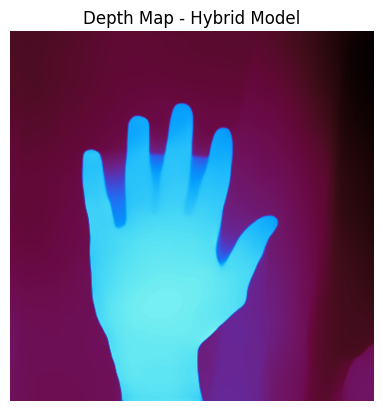

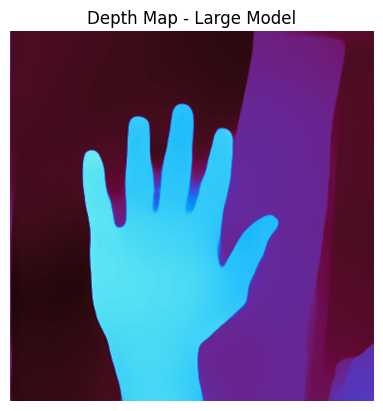

In [6]:
show_depth_map(frame, "Original Image")
show_depth_map(depth_s, "Depth Map - Small Model")
show_depth_map(depth_h, "Depth Map - Hybrid Model")
show_depth_map(depth_l, "Depth Map - Large Model")

In [7]:
frame = cv2.imread("image.png")
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

depth_s = midas_s.predict(frame)
depth_h = midas_h.predict(frame)
depth_l = midas_l.predict(frame)

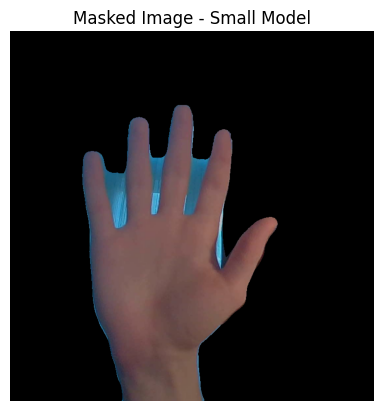

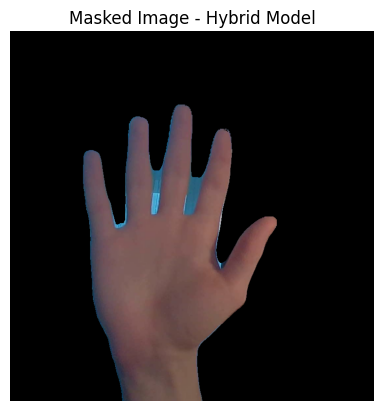

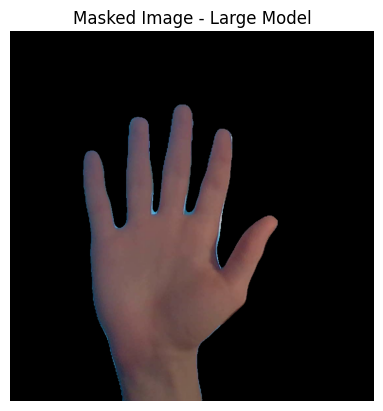

In [8]:
import numpy as np
def apply_mask(image, depth, depth_treshold=300):
    image = image.copy()
    depth = depth.copy()
    mask = mask_nearest_object(depth, depth_treshold)
    image[mask] = 0
    return image

show_depth_map(apply_mask(frame, depth_s, 570), "Masked Image - Small Model")
show_depth_map(apply_mask(frame, depth_h, 1650), "Masked Image - Hybrid Model")
show_depth_map(apply_mask(frame, depth_l, 30), "Masked Image - Large Model")

In [10]:
run_midas_bench(midas_s, frame, fps=30, use_cuda=True)
run_midas_bench(midas_h, frame, fps=30, use_cuda=True)
run_midas_bench(midas_l, frame, fps=30, use_cuda=True)

Using cuda
Processing time: 0.846703052520752 s
Using cuda
Processing time: 2.7521183490753174 s
Using cuda
Processing time: 4.67839789390564 s


In [11]:
run_midas_bench(midas_s, frame, fps=30, use_cuda=False)
run_midas_bench(midas_h, frame, fps=30, use_cuda=False)

Using cpu
Processing time: 4.663604259490967 s
Using cpu
Processing time: 46.25758457183838 s


In [13]:
midas_l.use_cpu()
depth_l = depth_map(midas_l, frame)

Using cpu
Processing time: 3.4248898029327393 s
